In [1]:
import tensorflow as tf
import keras

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Definieren des Modells
model = InceptionV3(weights='imagenet')

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
# Image path
path = 'Eingabebild/'
file = 'vogel.jpg'
img_file = os.path.join(path,file)

# Loading the image, and resizing it to default size
img = image.load_img(img_file, target_size=(229, 229))

# Converting the image to a Numpy array
x = image.img_to_array(img)

print(x.shape)
print(x)

(229, 229, 3)
[[[ 139.  129.  104.]
  [ 129.  123.   89.]
  [ 122.  116.   82.]
  ..., 
  [ 166.  135.  106.]
  [ 167.  142.  111.]
  [ 172.  155.  137.]]

 [[ 159.  141.  119.]
  [ 154.  140.  113.]
  [ 142.  128.  101.]
  ..., 
  [ 173.  138.  110.]
  [ 166.  129.  102.]
  [ 165.  139.  114.]]

 [[ 184.  163.  142.]
  [ 172.  152.  128.]
  [ 164.  148.  122.]
  ..., 
  [ 167.  134.  103.]
  [ 165.  130.  108.]
  [ 158.  127.   99.]]

 ..., 
 [[  41.   43.   29.]
  [  95.  101.   91.]
  [ 100.  107.   89.]
  ..., 
  [ 151.  159.  135.]
  [ 144.  152.  128.]
  [ 134.  144.  120.]]

 [[  44.   48.   34.]
  [ 102.  109.   91.]
  [  91.   99.   76.]
  ..., 
  [ 155.  165.  140.]
  [ 150.  161.  131.]
  [ 147.  161.  136.]]

 [[  68.   72.   58.]
  [  95.  102.   84.]
  [  91.   99.   76.]
  ..., 
  [ 169.  179.  154.]
  [ 148.  159.  129.]
  [ 128.  142.  117.]]]


In [6]:
# Adding extra dimension
x = np.expand_dims(x, axis=0)
print(x.shape)


(1, 229, 229, 3)


In [7]:
# Scaling the image
x = preprocess_input(x)

print(x.shape)
print(x)

(1, 229, 229, 3)
[[[[ 0.09019613  0.01176476 -0.18431371]
   [ 0.01176476 -0.03529412 -0.30196077]
   [-0.04313725 -0.09019607 -0.35686272]
   ..., 
   [ 0.30196083  0.05882359 -0.16862744]
   [ 0.30980396  0.11372554 -0.12941176]
   [ 0.34901965  0.21568632  0.07450986]]

  [[ 0.24705887  0.10588241 -0.06666666]
   [ 0.20784318  0.09803927 -0.11372548]
   [ 0.11372554  0.00392163 -0.20784312]
   ..., 
   [ 0.35686278  0.082353   -0.13725489]
   [ 0.30196083  0.01176476 -0.19999999]
   [ 0.29411769  0.09019613 -0.10588235]]

  [[ 0.44313729  0.27843142  0.11372554]
   [ 0.34901965  0.19215691  0.00392163]
   [ 0.28627455  0.16078436 -0.04313725]
   ..., 
   [ 0.30980396  0.05098045 -0.19215685]
   [ 0.29411769  0.0196079  -0.15294117]
   [ 0.23921573 -0.00392157 -0.2235294 ]]

  ..., 
  [[-0.67843139 -0.66274512 -0.77254903]
   [-0.25490195 -0.20784312 -0.28627449]
   [-0.21568626 -0.1607843  -0.30196077]
   ..., 
   [ 0.18431377  0.24705887  0.05882359]
   [ 0.12941182  0.19215691  0.

In [8]:
prediction = model.predict(x)

decoded = decode_predictions(prediction, top=3)[0]
print(decoded)

[('n01530575', 'brambling', 0.9999994), ('n01558993', 'robin', 3.4661898e-07), ('n03394916', 'French_horn', 1.2763554e-07)]


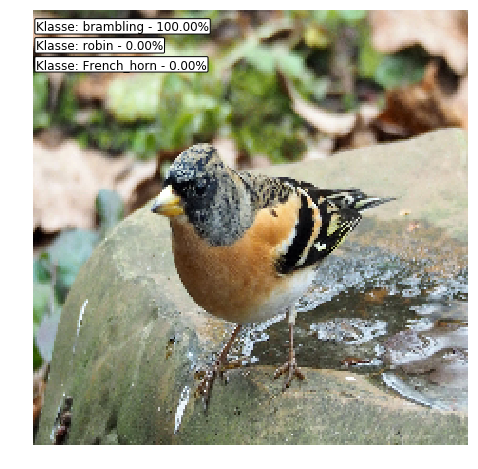

In [9]:
plt.figure(figsize=(8, 8))

pos_x, pos_y = 1,10
for id, lab, prob in decoded:
    plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab,prob*100),
            fontsize=12, color='black',
            bbox=dict(boxstyle="round", pad=0.1, fc='white'))
    pos_y += 10

plt.axis('off')
plt.imshow(img)